In [1]:
import docker, os

a = %pwd
wd = (a.rsplit('/',2))[0]

GENE = "ORF7a"
BLAST_Results=os.path.join("homologue", GENE, "B20210130A94466D2655679D1FD8953E075198DA8030B5FR.fasta")


D_CLUSTAL_O='quay.io/biocontainers/clustalo:1.2.4--1'

WORK_HOST_DIRECTORY=wd
WORK_CONT_DIRECTORY='/opt/project'

In [2]:
client = docker.from_env()
bwa_docker_cont = client.containers.run(
    image=D_CLUSTAL_O,
    volumes={WORK_HOST_DIRECTORY: {'bind': WORK_CONT_DIRECTORY,'mode': 'rw'}},
    working_dir= WORK_CONT_DIRECTORY+'/data/multi_align/',
    entrypoint="bash",
    command='{0}/scripts_bash/clustalo.sh {1} {2}'.format(WORK_CONT_DIRECTORY, BLAST_Results, GENE))


In [3]:
from Bio import SeqIO, AlignIO, Phylo

alin_fa = AlignIO.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.fasta"), "fasta")

print(alin_fa)

Alignment with 5 rows and 122 columns
MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...KTE sp|P0DTC7|NS7A_SARS2
MKIILFLTLIALASCELYHYQECVRGTTVLLKEPCPSGTYEGNS...KTE sp|Q3I5J0|NS7A_BCRP3
MKIILFLTLIALATCELYHYQECVRGTTVLLKEPCPSGTYEGNS...KTE sp|Q3LZX7|NS7A_BCHK3
MKIILFLTLIVFTSCELYHYQECVRGTTVLLKEPCPSGTYEGNS...KTE sp|P59635|NS7A_SARS
MKIILFLTLIALASSELYHYQECVRGTTVLLKEPCPSGTYEGNS...KTE sp|Q0Q470|NS7A_BC279


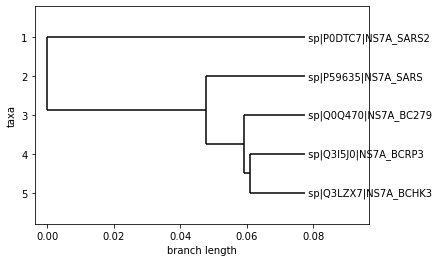

In [6]:
from Bio import Phylo
tree = Phylo.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.dnd"), "newick")
Phylo.draw(tree)